# Set up kiwiglider

## C-compiler

You will need a C-compiler to use kiwiglider, since it relies on a package called dbdreader. See dbdreader installation suggestions for [Linux](https://github.com/smerckel/dbdreader?tab=readme-ov-file#installation-linux) and [Windows](https://github.com/smerckel/dbdreader?tab=readme-ov-file#installation-on-windows) for information about C-compilers (note that you do not need to install dbdreader itself at this stage)

## Environment

We recommend creating a separate environment for your work with kiwiglider.

1. `conda create -n kiwiglider`
1. `conda activate kiwiglider`

## Install

As of late May 2025, one dependency fails under pip but works with conda. As such, also do `conda install compliance-checker cc-plugin-glider`

### Method 1

From your new virtual environment, you can now install kiwiglider. The easiest method as of late May 2025 is with

`pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://test.pypi.org/simple/ kiwiglider`

### Method 2

Another method of installation is through git and pip. This will allow you to edit kiwiglider in a local repository. After you have [Git](https://git-scm.com/downloads) installed on your machine: 

1. Clone kiwiglider to your local machine: `git clone https://github.com/adeverne/kiwiglider`
1. Change to parent directory of kiwiglider
1. Install kiwiglider with `pip install -e ./kiwiglider`

## Notebook

To run this notebook, you will also need to `conda install ipykernel notebook`

# Load kiwiglider functions and classes

In [1]:
#general imports
from os.path import join as join_path
from os.path import exists
from os import sep, makedirs
import logging
#kiwiglider imports
from kiwiglider.basic import DeploymentYAML, DeploymentNetCDF

# User-defined variables

Start the logging package, which will keep us updated during processing

In [2]:
logging.basicConfig(level='INFO')

Specify the directory where all the organization's deployments and metadata live. In NIWA's case, and before running this notebook, the main directory is organized with


- deployments_NIWA.xlsx
- GLD0035
    - Raw
        - Cache
        - *.sbd
        - *.tbd
        - *.dbd
        - *.ebd
- GLD0040
    - Raw
        - Cache
        - *.sbd
        - *.tbd
        - *.dbd
        - *.ebd


and so on for all deployments

In [3]:
directory = join_path('C:',sep,'Users','elmerc','OneDrive - NIWA','Documents','SCRATCH')

Specify the deployment name to focus on and who's running this notebook

In [4]:
deployment_ID = 35
deployment = 'GLD{:04d}'.format(deployment_ID)
author = 'Cassandra Elmer'

# Create YAML file for PyGlider ingest

This YAML will contain the metadata extracted from our deployment Excel sheet and tells PyGlider (an internal dependency of KiwiGlider) how to map glider variables to human-readable ones.

First we'll need to create the folder to hold "delayed mode files" (ones from when the glider returns to shore that contain the full dataset) and then create the YAML that will live there.

In [5]:
if not exists(join_path(directory,deployment,'Delayed')):
    makedirs(join_path(directory,deployment,'Delayed'))

yml = DeploymentYAML(ID=deployment_ID)
yml.construct_yaml(excelsheet=join_path(directory,'deployments_NIWA.xlsx'))
yml.write_yaml(outname=join_path(directory,deployment,'Delayed','deployment_metadata.yml'))

INFO:kiwiglider.basic:Creating deployment YAML for 35
INFO:kiwiglider.basic:Getting metadata from C:\Users\elmerc\OneDrive - NIWA\Documents\SCRATCH\deployments_NIWA.xlsx
INFO:kiwiglider.basic:Adding global metadata to deployment YAML
INFO:kiwiglider.basic:Adding glider device metadata to deployment YAML
INFO:kiwiglider.basic:Adding variable metadata to deployment YAML
INFO:kiwiglider.basic:Adding profile variable metadata to deployment YAML
INFO:kiwiglider.basic:Adding QARTOD test metadata to deployment YAML
INFO:kiwiglider.basic:Wrting deployment YAML for 35 as C:\Users\elmerc\OneDrive - NIWA\Documents\SCRATCH\GLD0035\Delayed\deployment_metadata.yml


# Create delayed mode summary

## Create L0 (timeseries only)

Here, we create a single time series for the whole deployment.

L0 indicates that it hasn't undergone post-processing. For this reason, it is not recommended to disseminate this data for analysis.

We could also split the time series into profiles (down and up glides) by removing the `l0profile_directory=None` argument to the `make_l0` method, but for smaller footprint and speed of processing for our purposes, we'll stick with the time series. Note that this step takes about a minute.

In [6]:
delayed = DeploymentNetCDF(main_directory=join_path(directory,deployment),style='Delayed')
delayed.make_L0(l0profile_directory=None)

INFO:pyglider.slocum:C:\Users\elmerc\OneDrive - NIWA\Documents\SCRATCH\GLD0035\Raw/*.[d|e]bd
INFO:pyglider.slocum:working on backscatter_700
INFO:pyglider.slocum:names: backscatter_700 sci_flbbcd_bb_units
INFO:pyglider.slocum:working on beam_attenuation
INFO:pyglider.slocum:names: beam_attenuation sci_lisst_beamc
INFO:pyglider.slocum:working on cdom
INFO:pyglider.slocum:names: cdom sci_flbbcd_cdom_units
INFO:pyglider.slocum:working on chlorophyll
INFO:pyglider.slocum:names: chlorophyll sci_flbbcd_chlor_units
INFO:pyglider.slocum:working on conductivity
INFO:pyglider.slocum:names: conductivity sci_water_cond
INFO:pyglider.slocum:working on heading
INFO:pyglider.slocum:names: heading m_heading
INFO:pyglider.slocum:working on latitude
INFO:pyglider.slocum:names: latitude m_gps_lat
INFO:pyglider.slocum:working on longitude
INFO:pyglider.slocum:names: longitude m_gps_lon
INFO:pyglider.slocum:working on mean_size
INFO:pyglider.slocum:names: mean_size sci_lisst_meansize
INFO:pyglider.slocum:w

## Create (default) summary page

Here we create the summary page and display it, but not save it. This allows us to make edits as desired before the final version. Note that each summary creation takes about 30 seconds.

INFO:kiwiglider.basic:Creating summary page
INFO:kiwiglider.basic:Reading C:\Users\elmerc\OneDrive - NIWA\Documents\SCRATCH\GLD0035\Delayed\L0-timeseries/GLD0035.nc into memory
INFO:kiwiglider.basic:Adding Density (kg m-3) plot to summary page
INFO:kiwiglider.basic:Adding water salinity (1e-3) plot to summary page
INFO:kiwiglider.basic:Adding Temperature (Celsius) plot to summary page
INFO:kiwiglider.basic:Adding map to summary page
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
INFO:kiwiglider.basic:Adding metadata snapshot to summary page
INFO:kiwiglider.basic:Adding header information to summary page
INFO:kiwiglider.basic:Displaying summary page


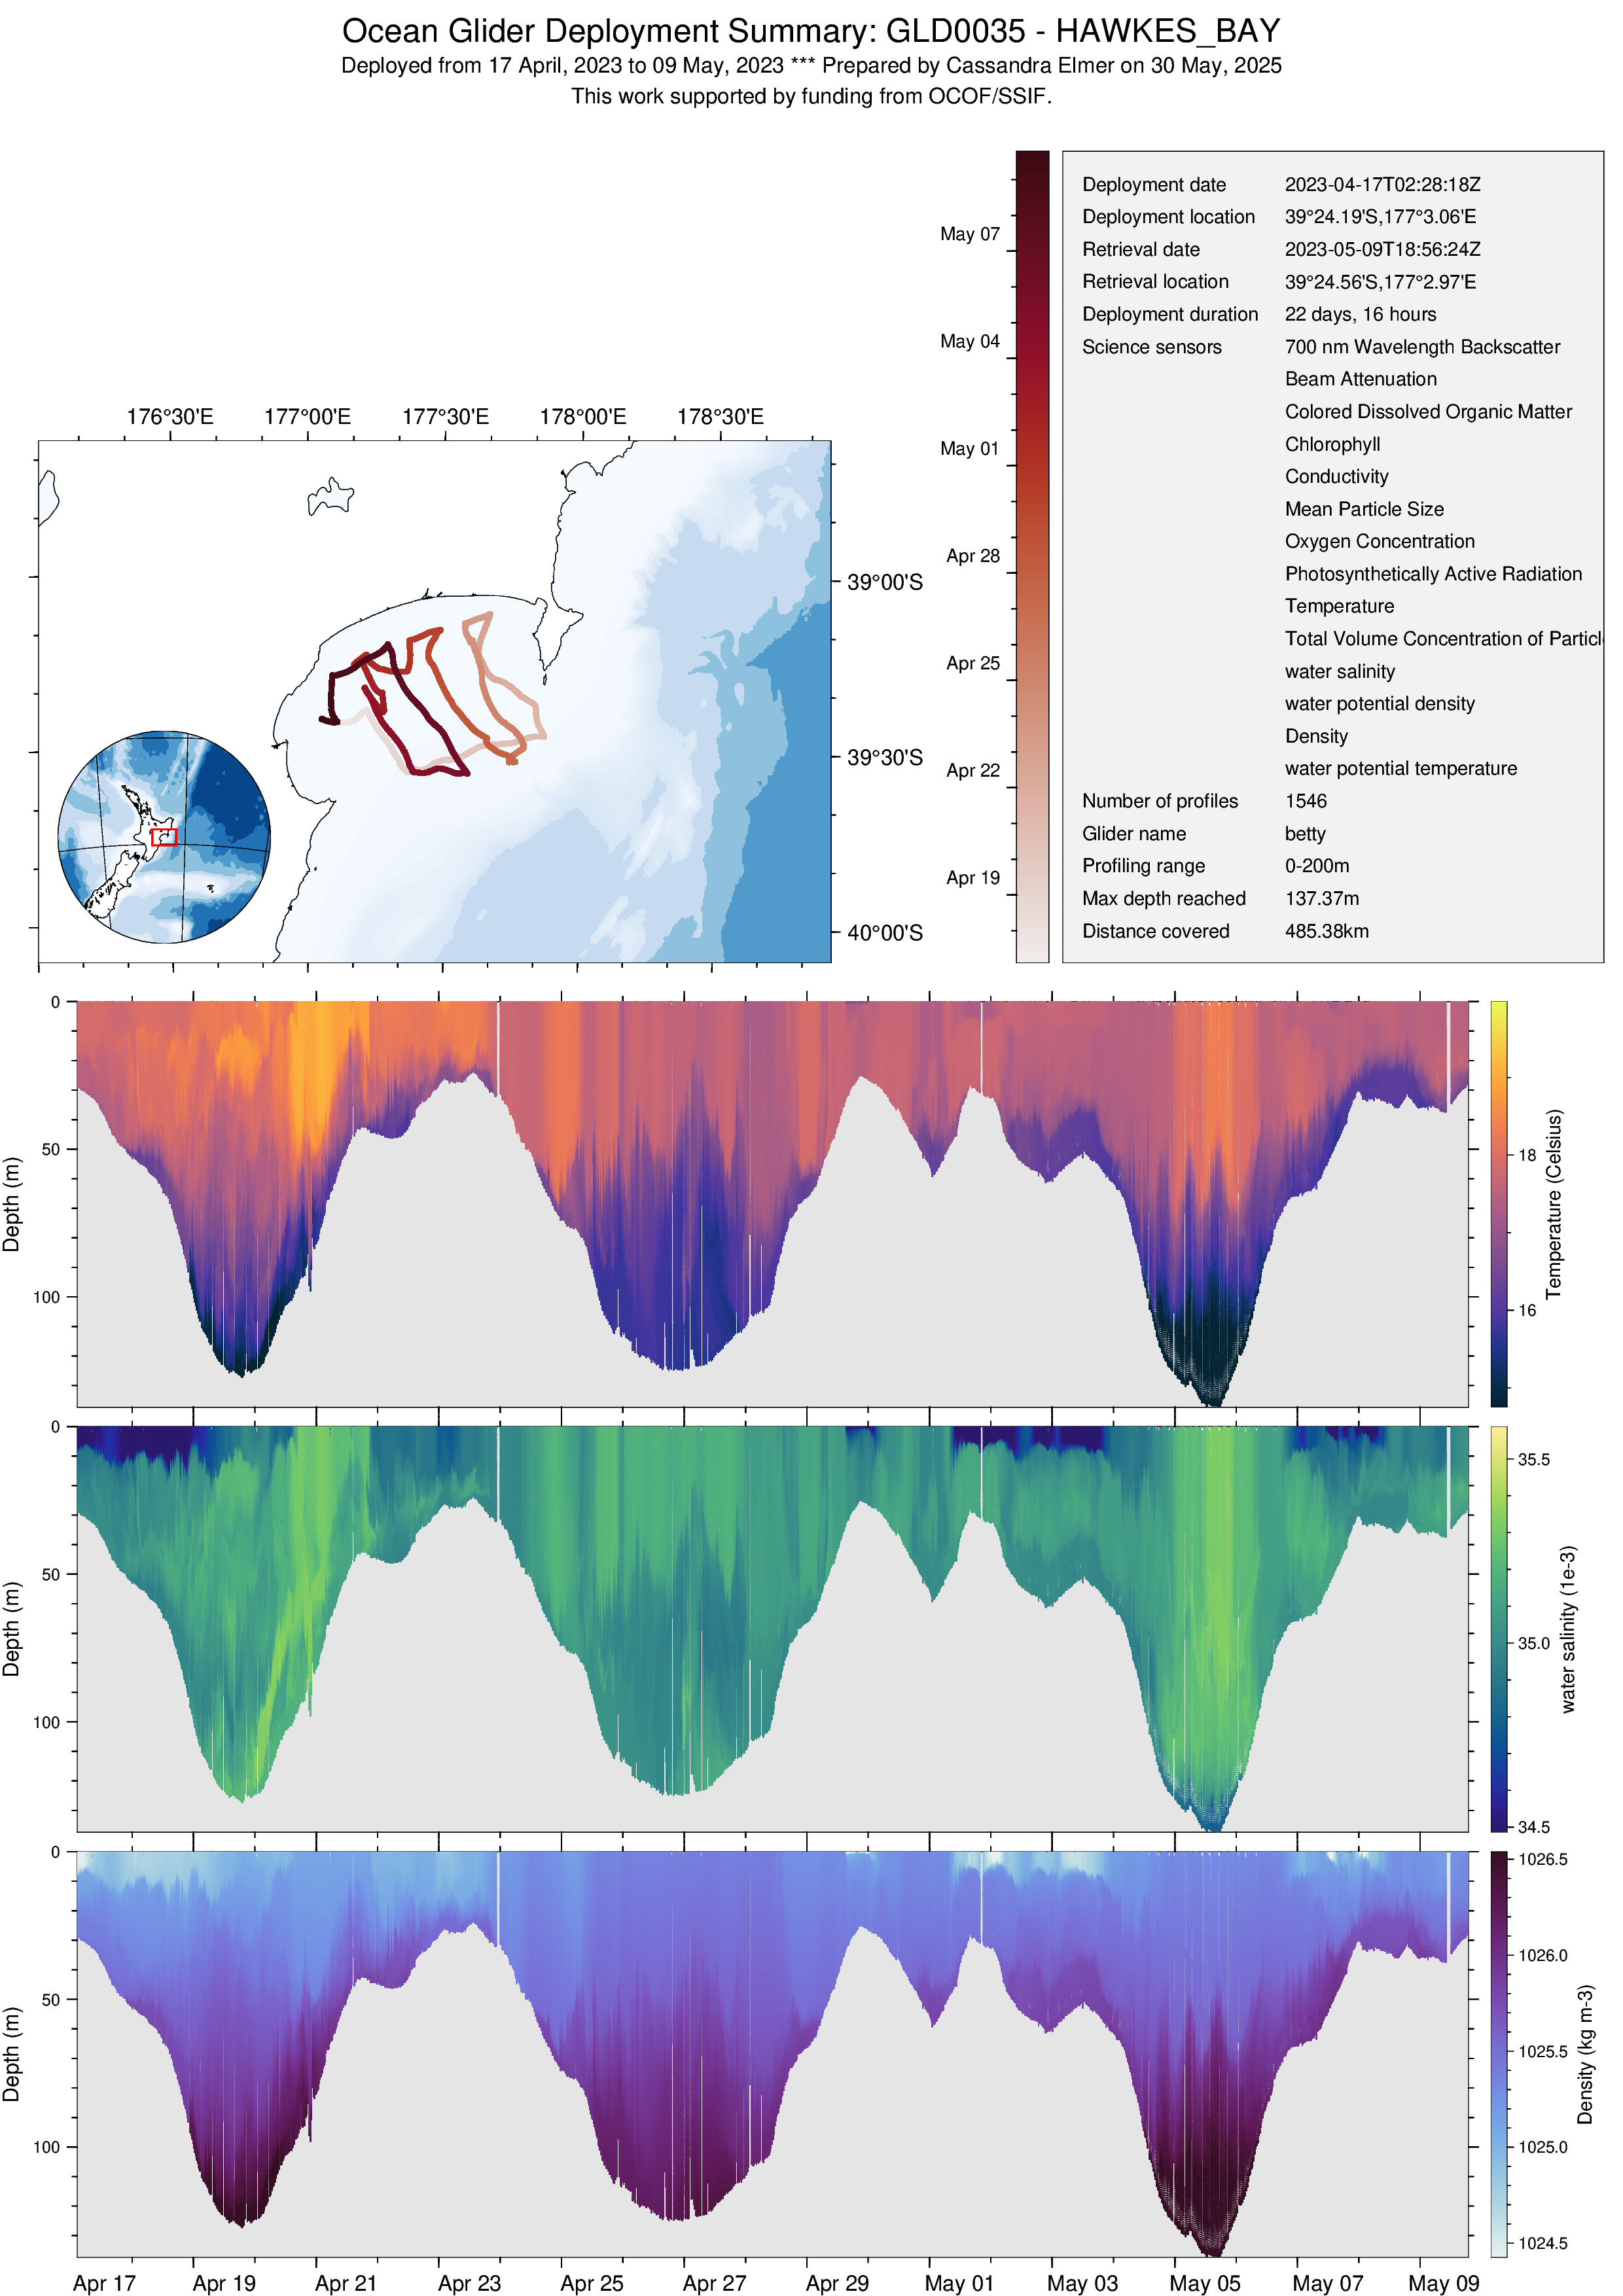

In [7]:
delayed.create_summary(output_file=False, display=True, author=author)

Let's get a bit closer than the automated map limits. The `map_bounds` argument to the `create_summary` method allows us to override the default limits.

INFO:kiwiglider.basic:Creating summary page
INFO:kiwiglider.basic:Reading C:\Users\elmerc\OneDrive - NIWA\Documents\SCRATCH\GLD0035\Delayed\L0-timeseries/GLD0035.nc into memory
INFO:kiwiglider.basic:Adding Density (kg m-3) plot to summary page
INFO:kiwiglider.basic:Adding water salinity (1e-3) plot to summary page
INFO:kiwiglider.basic:Adding Temperature (Celsius) plot to summary page
INFO:kiwiglider.basic:Adding map to summary page
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
INFO:kiwiglider.basic:Adding metadata snapshot to summary page
INFO:kiwiglider.basic:Adding header information to summary page
INFO:kiwiglider.basic:Displaying summary page


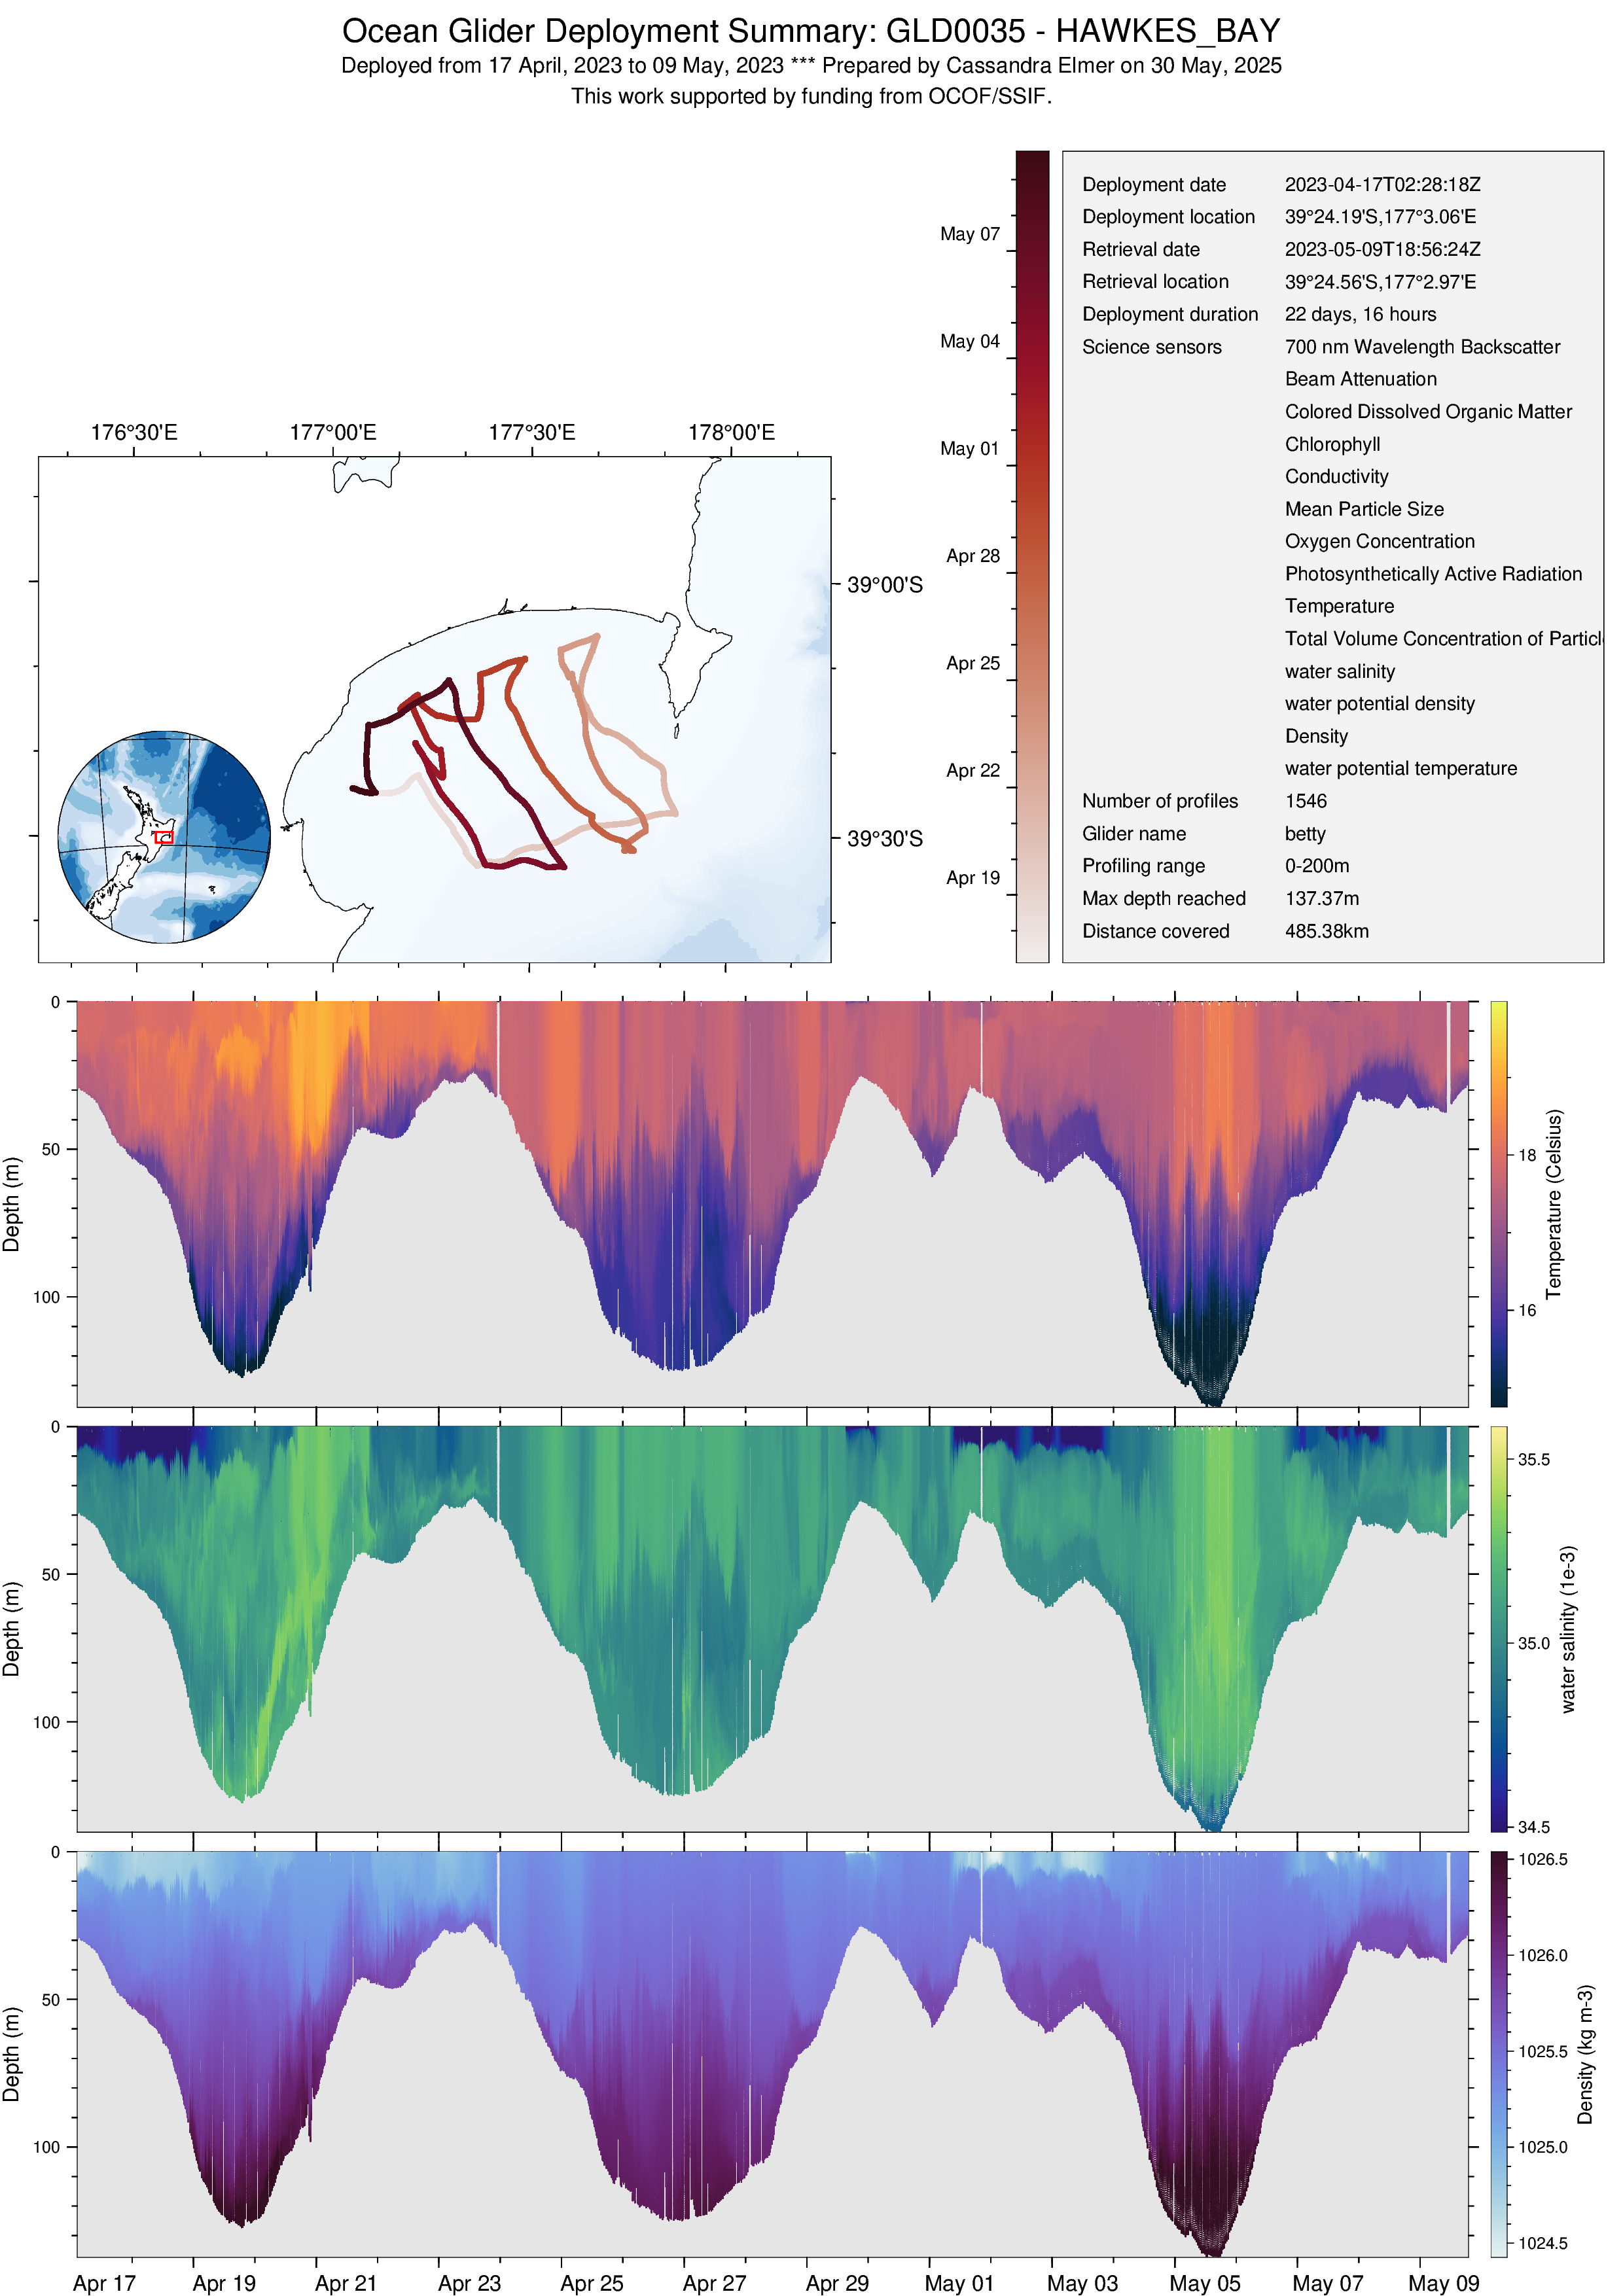

In [8]:
delayed.create_summary(
    output_file=False, display=True, author=author,
    map_bounds=[-39.75, -38.75, 176.25, 178.25]
)

That's better.

Since this version is good, we'll save it with the default name created from the timeseries file by removing the argument `output_file`. We also won't display it (the default behaviour) this time by removing the `display` argument.

In [9]:
delayed.create_summary(
    author=author,
    map_bounds=[-39.75, -38.75, 176.25, 178.25]
)

INFO:kiwiglider.basic:Creating summary page
INFO:kiwiglider.basic:Reading C:\Users\elmerc\OneDrive - NIWA\Documents\SCRATCH\GLD0035\Delayed\L0-timeseries/GLD0035.nc into memory
INFO:kiwiglider.basic:Adding Density (kg m-3) plot to summary page
INFO:kiwiglider.basic:Adding water salinity (1e-3) plot to summary page
INFO:kiwiglider.basic:Adding Temperature (Celsius) plot to summary page
INFO:kiwiglider.basic:Adding map to summary page
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
INFO:kiwiglider.basic:Adding metadata snapshot to summary page
INFO:kiwiglider.basic:Adding header information to summary page
INFO:kiwiglider.basic:Saving summary page as C:\Users\elmerc\OneDrive - NIWA\Documents\SCRATCH\GLD0035\Delayed\GLD0035.png


## Create additional summary page

Now let's plot some different variables. We can get a list from the dataset we created earlier.

In [10]:
data = delayed.read_timeseries(join_path('L0-timeseries',deployment+'.nc'))
data.data_vars

INFO:kiwiglider.basic:Reading C:\Users\elmerc\OneDrive - NIWA\Documents\SCRATCH\GLD0035\Delayed\L0-timeseries\GLD0035.nc into memory


Data variables:
    latitude                    (time) float64 6MB ...
    longitude                   (time) float64 6MB ...
    backscatter_700             (time) float64 6MB ...
    beam_attenuation            (time) float64 6MB ...
    cdom                        (time) float64 6MB ...
    chlorophyll                 (time) float64 6MB ...
    conductivity                (time) float64 6MB ...
    heading                     (time) float64 6MB ...
    mean_size                   (time) float64 6MB ...
    oxygen_concentration        (time) float64 6MB ...
    par                         (time) float64 6MB ...
    pitch                       (time) float64 6MB ...
    pressure                    (time) float64 6MB ...
    roll                        (time) float64 6MB ...
    temperature                 (time) float64 6MB ...
    total_volume_concentration  (time) float64 6MB ...
    water_velocity_eastward     (time) float64 6MB ...
    water_velocity_northward    (time) float64 6M

The default summary plots temperature using cmocean's Thermal_20 colormap, salinity using cmocean's Haline_20 colormap, and density using cmocean's Dense_20 colormap, but you may specify anything from the dataset with any [palettable color map](https://jiffyclub.github.io/palettable/). Let's look at some biological-related properties.

INFO:kiwiglider.basic:Creating summary page
INFO:kiwiglider.basic:Reading C:\Users\elmerc\OneDrive - NIWA\Documents\SCRATCH\GLD0035\Delayed\L0-timeseries/GLD0035.nc into memory
INFO:kiwiglider.basic:Adding Colored Dissolved Organic Matter (ppb) plot to summary page
INFO:kiwiglider.basic:Adding Chlorophyll (mg m-3) plot to summary page
INFO:kiwiglider.basic:Adding Oxygen Concentration (umol l-1) plot to summary page
INFO:kiwiglider.basic:Adding map to summary page
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
INFO:kiwiglider.basic:Adding metadata snapshot to summary page
INFO:kiwiglider.basic:Adding header information to summary page
INFO:kiwiglider.basic:Displaying summary page


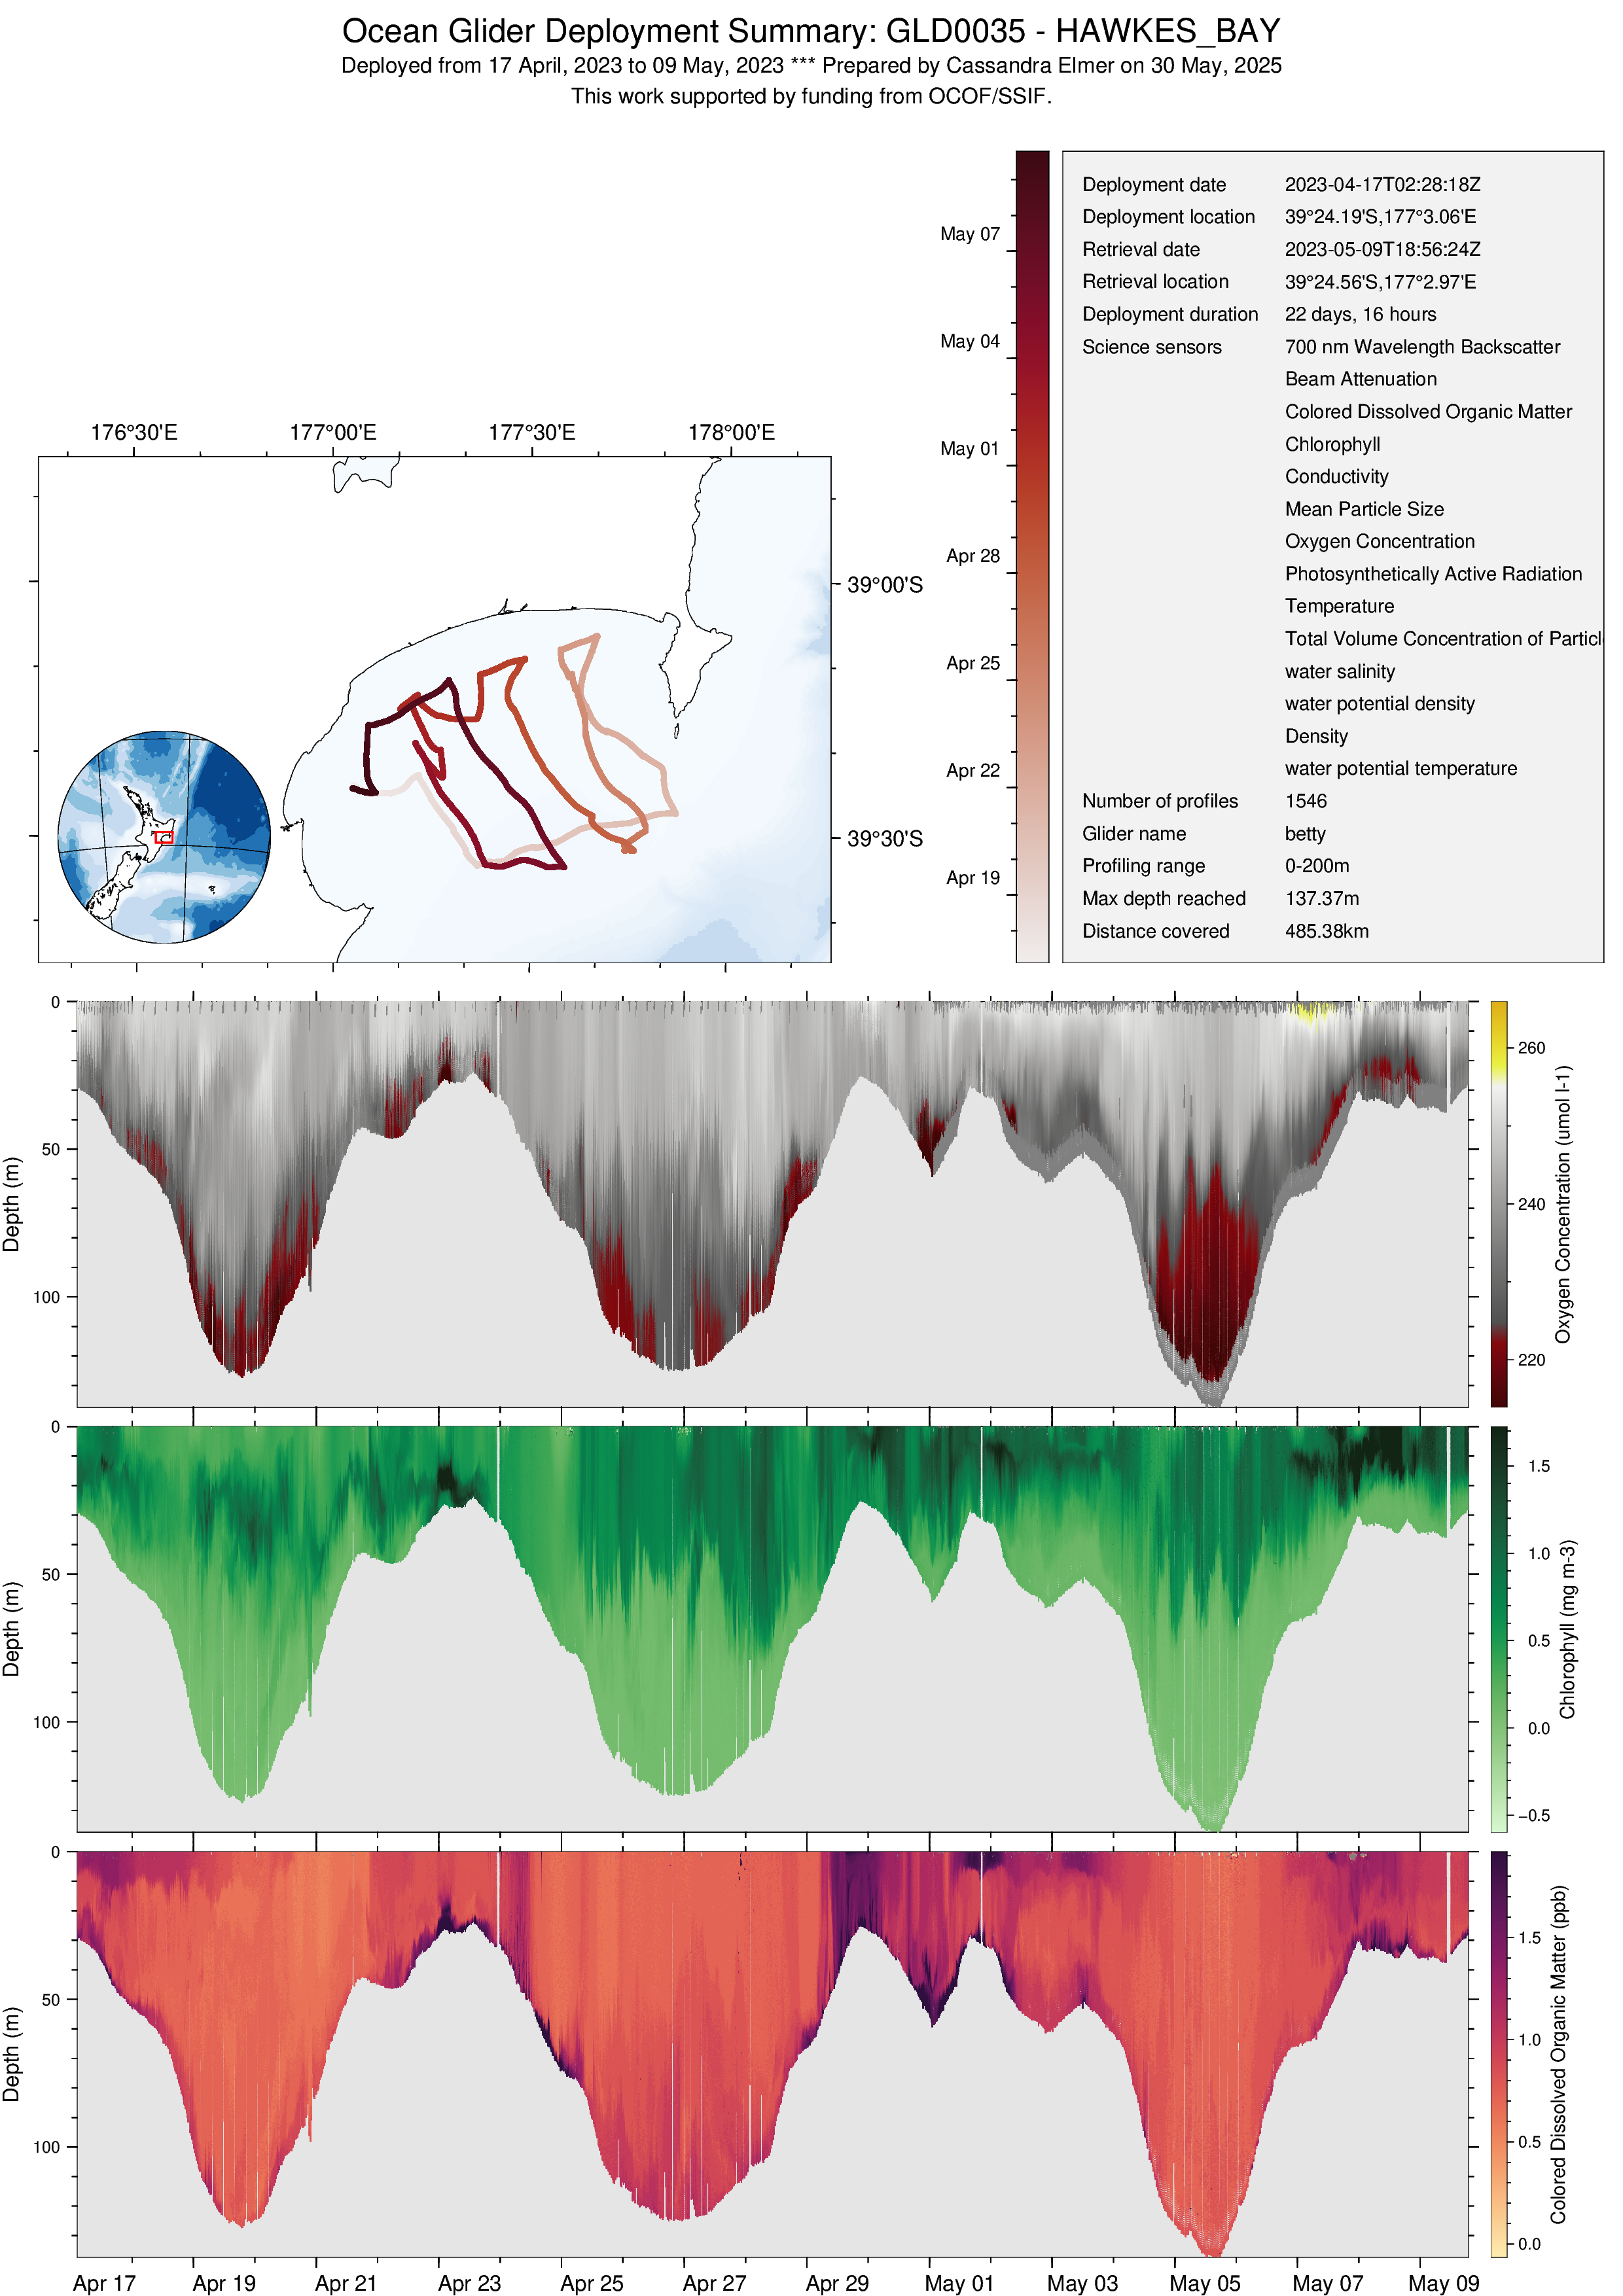

In [11]:
delayed.create_summary(
    output_file=False, display=True, author=author,
    map_bounds=[-39.75, -38.75, 176.25, 178.25],
    plots=(
        {'source': 'oxygen_concentration', 'cmap': 'cmocean.sequential.Oxy_20'},
        {'source': 'chlorophyll', 'cmap': 'cmocean.sequential.Algae_20'},
        {'source': 'cdom', 'cmap': 'cmocean.sequential.Matter_20'}
    )
)

To save this one, we'll need to specify a name with the `output_file` argument so the default one doesn't get overwritten. Once again, we will save but not `display`.

In [12]:
delayed.create_summary(
    output_file=deployment+'_OxyChlCDOM.png', author=author,
    map_bounds=[-39.75, -38.75, 176.25, 178.25],
    plots=(
        {'source': 'oxygen_concentration', 'cmap': 'cmocean.sequential.Oxy_20'},
        {'source': 'chlorophyll', 'cmap': 'cmocean.sequential.Algae_20'},
        {'source': 'cdom', 'cmap': 'cmocean.sequential.Matter_20'}
    )
)

INFO:kiwiglider.basic:Creating summary page
INFO:kiwiglider.basic:Reading C:\Users\elmerc\OneDrive - NIWA\Documents\SCRATCH\GLD0035\Delayed\L0-timeseries/GLD0035.nc into memory
INFO:kiwiglider.basic:Adding Colored Dissolved Organic Matter (ppb) plot to summary page
INFO:kiwiglider.basic:Adding Chlorophyll (mg m-3) plot to summary page
INFO:kiwiglider.basic:Adding Oxygen Concentration (umol l-1) plot to summary page
INFO:kiwiglider.basic:Adding map to summary page
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
INFO:kiwiglider.basic:Adding metadata snapshot to summary page
INFO:kiwiglider.basic:Adding header information to summary page
INFO:kiwiglider.basic:Saving summary page as C:\Users\elmerc\OneDrive - NIWA\Documents\SCRATCH\GLD0035\Delayed\GLD0035_OxyChlCDOM.png


## What other variables would you like to summarise?